In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns

plt.style.use("ggplot")
tf.random.set_seed(1)

## Import data

In [103]:
# os.chdir(os.path.join(os.getcwd(), "titanic data"))
os.chdir("/Users/NoahRipstein/PycharmProjects/Titanic/titanic data")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

full_df = pd.concat([train, test])
print(len(full_df.index), len(train.index), len(test.index))

1309 891 418


In [104]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
# there are some ages missing. Let's replace those with the mean
mean_age = full_df["Age"].mean() # mean age

# Fill missing values in column A with the mean
train["Age"] = train["Age"].fillna(mean_age)  # maybe it would be better to have it draw from a normal dist w those characteristics?
train["Embarked"] = train["Embarked"].fillna(full_df["Embarked"].value_counts().index[0])  # replace missing embarked with most common

# do same for test data
test["Age"] = train["Age"].fillna(mean_age)
test["Embarked"] = train["Embarked"].fillna(full_df["Embarked"].value_counts().index[0])

print(train.info())
print(test.info())

# still need to figure out how cabin fits into this, and what to do about the nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [106]:
# there's a fare missing from test dataset. I'll put the average fare in as a replacement
test["Fare"] = train["Fare"].fillna(full_df["Fare"].mean())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [107]:

train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.735277    0.523008   
std     257.353842    0.486592    0.836071   13.002218    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.881138    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

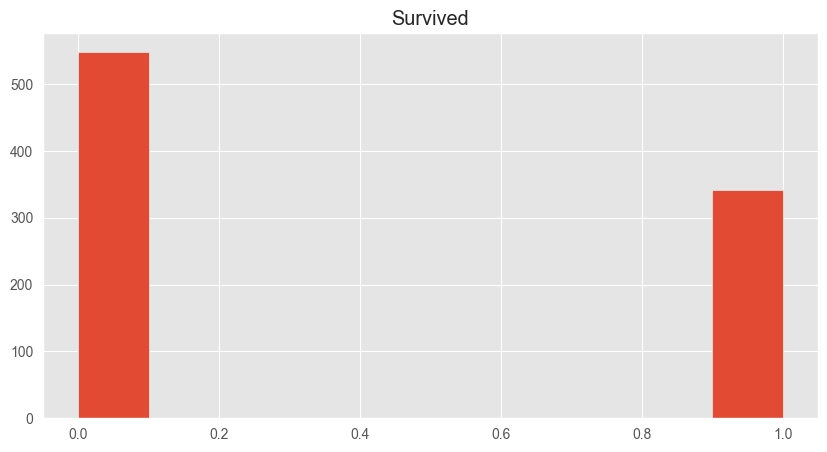

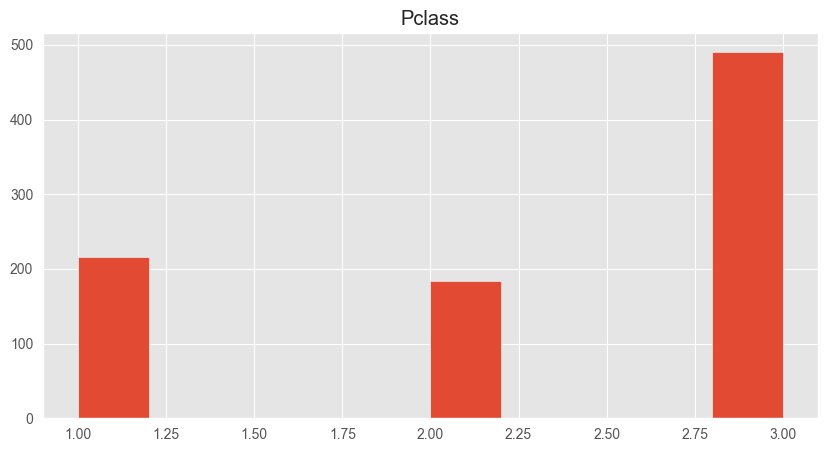

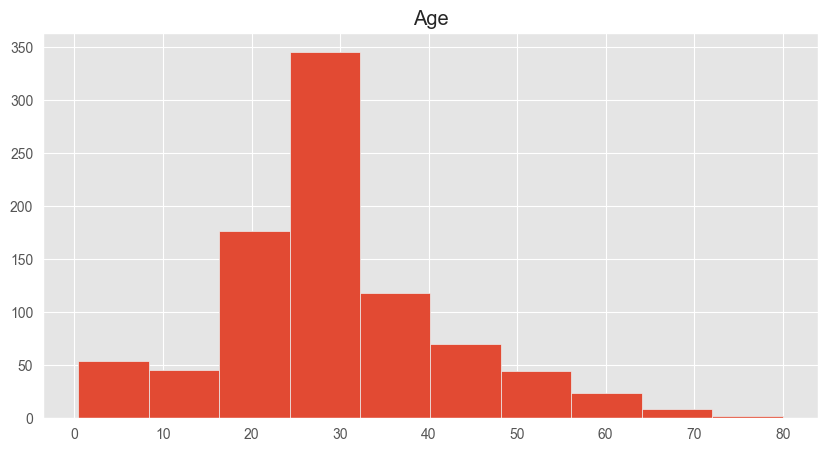

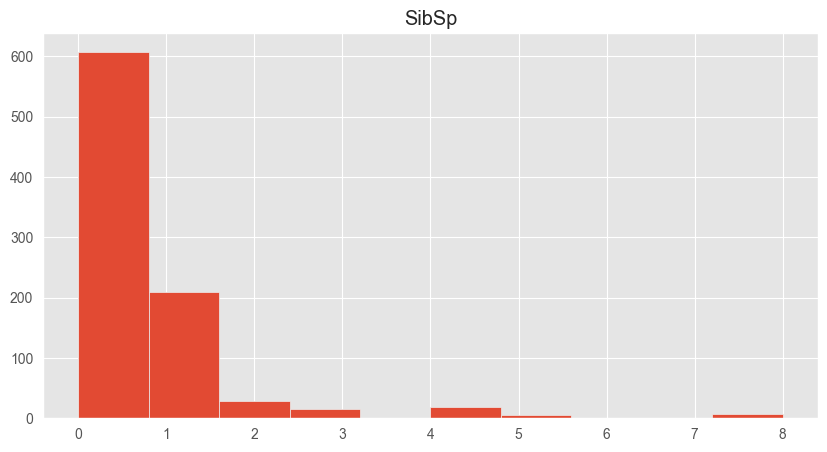

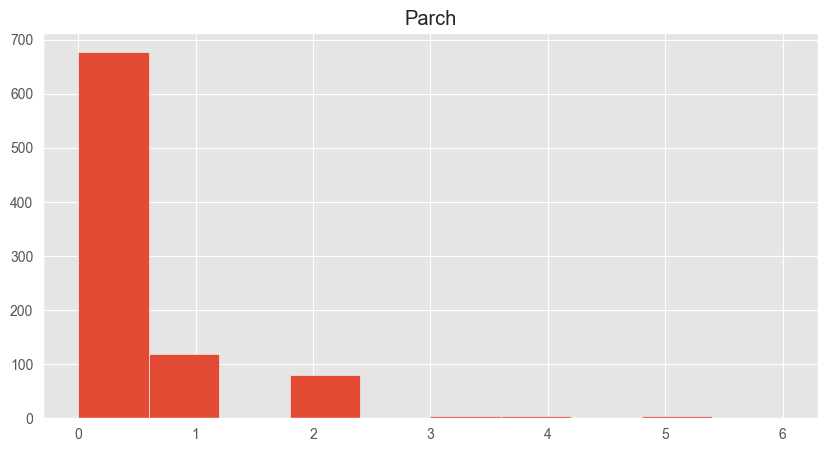

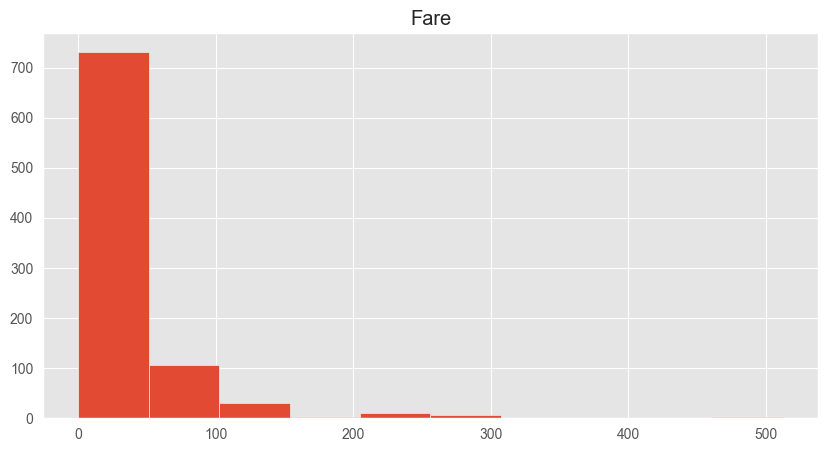

In [108]:
# I want to visualize numeric variables with histograms
numeric_cols = train.describe().columns

for col in numeric_cols[1:]:  # exclude first element because visualizing passengerid is not helpful
    plt.figure(figsize=(10, 5))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

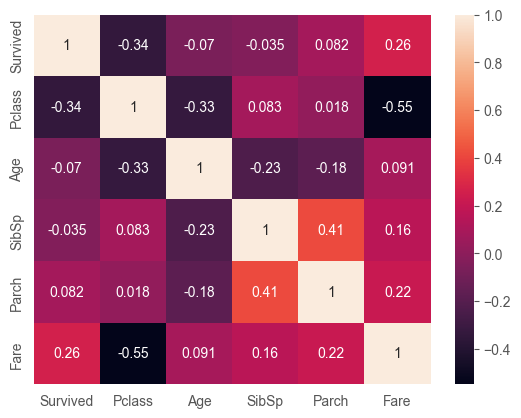

In [109]:
# correlation matrix
no_id = train.drop(["PassengerId"], axis=1)
sns.heatmap(no_id[numeric_cols[1:]].corr(), annot=True)
plt.show()

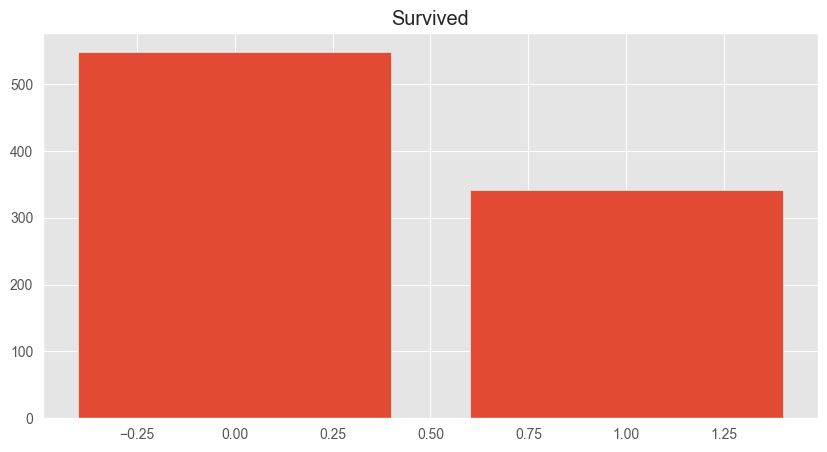

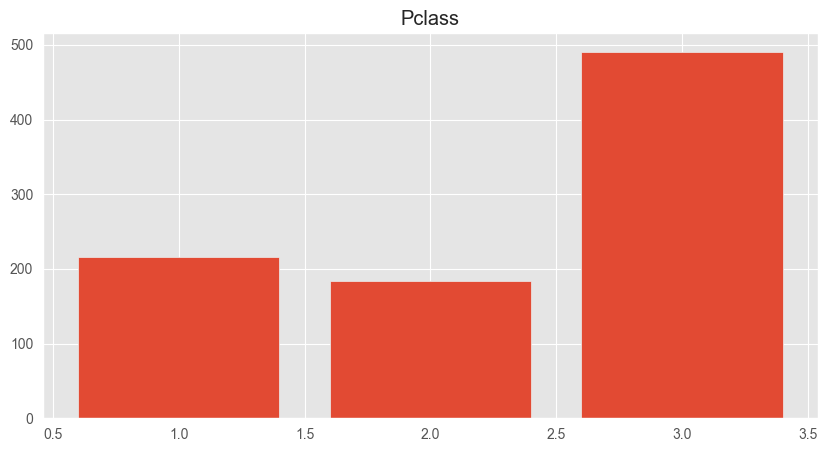

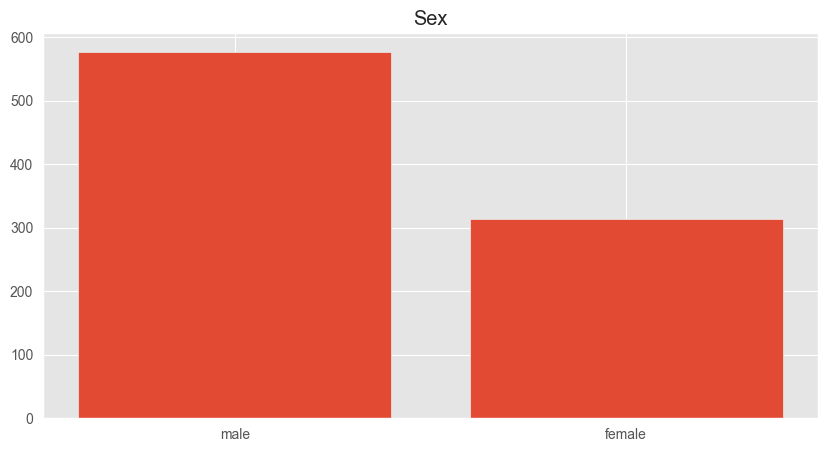

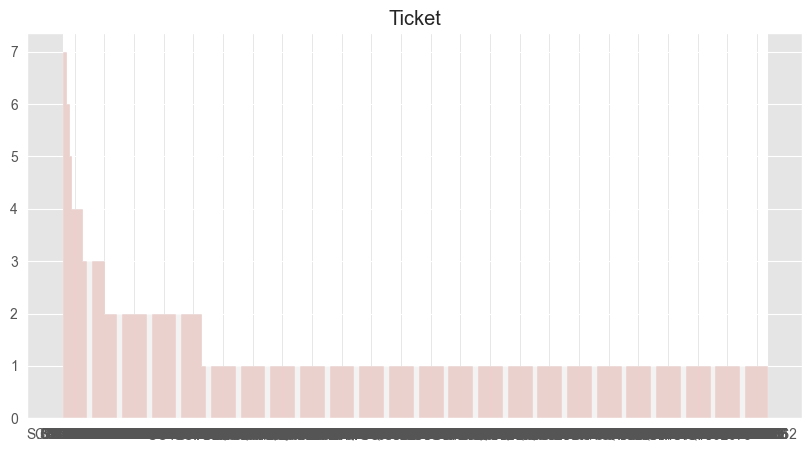

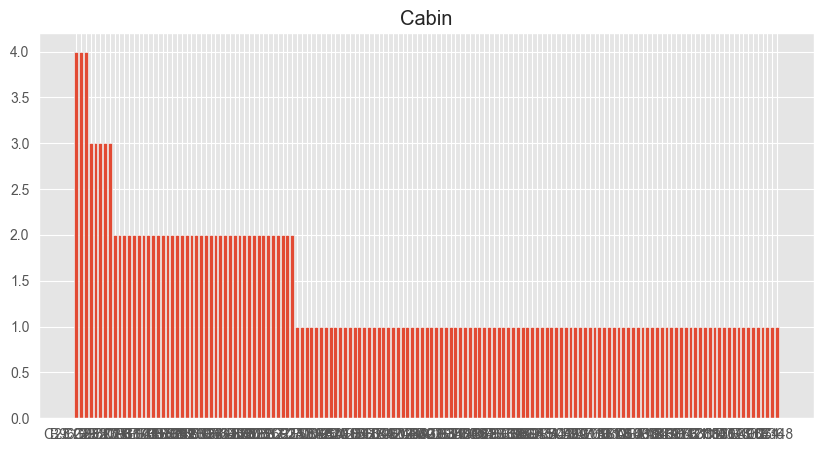

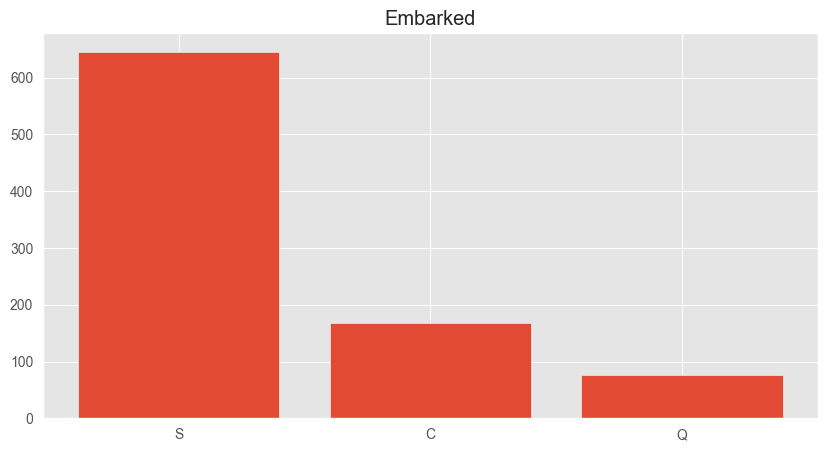

In [110]:
categorical_cols = ['Survived','Pclass','Sex','Ticket','Cabin','Embarked']
# print(categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    plt.bar(train[categorical_cols][col].value_counts().index, train[categorical_cols][col].value_counts())
    plt.title(col)
    plt.show()

In [111]:
# let's do a simple test where we don't account for any categorical variables
to_drop = categorical_cols + ["PassengerId", "Survived", "Name"]
x_train1_feed = train.drop(to_drop, axis=1)
y_train1_feed = train["Survived"]
print(x_train1_feed.columns)


from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1_feed, y_train1_feed, test_size=0.2, random_state=1)

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [112]:
# building first neural network to try
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="ReLU"),
    # tf.keras.layers.Dense(5, activation="ReLU"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

history1 = model1.fit(x_train1, y_train1, epochs=200, verbose=0)

print(model1.evaluate(x_test1, y_test1))

6/6 [==============================] - 0s 585us/step - loss: 0.6155 - accuracy: 0.6648
[0.6155143976211548, 0.6648044586181641]


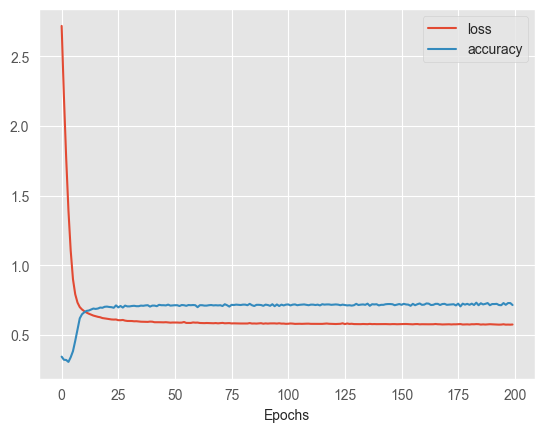

In [113]:
pd.DataFrame(history1.history).plot()
plt.xlabel("Epochs")
plt.show()

In [114]:
# let's try a better one now and deal with categorical variables

# turn sex into 1 and 0. now we can feed it to the model
train["Sex"] = train["Sex"].map(lambda sex: int(sex == "male"))
test["Sex"] = test["Sex"].map(lambda sex: int(sex == "male"))



In [115]:
# one hot encode embarked
embarked_dummies_train = pd.get_dummies(train["Embarked"], prefix="Embarked") # one-hot encode the embarked column using pd.get_dummies
train = pd.concat([train, embarked_dummies_train], axis=1) # concatenate the one-hot encoded column with the original dataframe
train = train.drop("Embarked", axis=1)

# same for test
embarked_dummies_test = pd.get_dummies(test["Embarked"], prefix="Embarked") # one-hot encode the embarked column using pd.get_dummies
test = pd.concat([test, embarked_dummies_test], axis=1) # concatenate the one-hot encoded column with the original dataframe
test = test.drop("Embarked", axis=1)
# print(train)
# print(test)


In [116]:
# what can be done with these three? Titles can be dealt with
remaining_cat = ['Ticket','Cabin', "Name"]


# not sure what can be done with cabin or titles
print(train["Cabin"].info())
print(train["Cabin"].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


## Dealing with names

In [117]:
# need to make a function to get name and convert to title
def title_helper(name):
    as_list = name.split(" ")
    for i, word in enumerate(as_list):
        if word[-1] == ",":
            return as_list[i + 1]
    else:
        return name  # great, this wasn't needed!

train["Title"] = train["Name"].apply(lambda x: title_helper(x))


test["Title"] = test["Name"].apply(lambda x: title_helper(x))
# print(train["Title"].value_counts())
# print(test["Title"].value_counts())

def merge_title_helper(title):
    if title in ["Don.", "Major.", "Capt.", "Jonkheer.", "Rev.", "Col.", "Dr.", "the", "Sir."]: # there's 1 "the". I didn't actually check if it's a man
        return "Mr."
    elif title in ["Countess.", "Mme.", "Dona.", "Lady."]:
        return "Mrs."
    elif title in ["Mlle.", "Ms."]:
        return "Miss."
    else:
        return title

train["Title"] = train["Title"].apply(lambda x: merge_title_helper(x))
test["Title"] = test["Title"].apply(lambda x: merge_title_helper(x))

# drop names now
train = train.drop(["Name"], axis=1)
test = test.drop(["Name"], axis=1)

print(train["Title"].value_counts())
print(test["Title"].value_counts())


Mr.        539
Miss.      185
Mrs.       127
Master.     40
Name: Title, dtype: int64
Mr.        245
Miss.       79
Mrs.        73
Master.     21
Name: Title, dtype: int64


In [118]:
# one hot encode titles
title_dummies_train = pd.get_dummies(train["Title"], prefix="Title") # one-hot encode the title column using pd.get_dummies
train = pd.concat([train, title_dummies_train], axis=1) # concatenate the one-hot encoded column with the original dataframe
train = train.drop("Title", axis=1)

# same for test
title_dummies_test = pd.get_dummies(test["Title"], prefix="Title")
test = pd.concat([test, title_dummies_test], axis=1)
test = test.drop("Title", axis=1)

## Lets try building a better neural network after this additional preprocessing

In [119]:
# train test split
# print(train.columns)
to_drop = ["Cabin", "Ticket", "Survived", "PassengerId"]
x_train2_feed = train.drop(to_drop, axis=1)
y_train2_feed = train["Survived"]

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train2_feed, y_train2_feed, test_size=0.2, random_state=1)
print(x_train2)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
301       3    1  29.881138      2      0  23.2500           0           1   
309       1    0  30.000000      0      0  56.9292           1           0   
516       2    0  34.000000      0      0  10.5000           0           0   
120       2    1  21.000000      2      0  73.5000           0           0   
570       2    1  62.000000      0      0  10.5000           0           0   
..      ...  ...        ...    ...    ...      ...         ...         ...   
715       3    1  19.000000      0      0   7.6500           0           0   
767       3    0  30.500000      0      0   7.7500           0           1   
72        2    1  21.000000      0      0  73.5000           0           0   
235       3    0  29.881138      0      0   7.5500           0           0   
37        3    1  21.000000      0      0   8.0500           0           0   

     Embarked_S  Title_Master.  Title_Miss.  Title_Mr.  Title_M

In [120]:
# building second neural network to try
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit
history2 = model2.fit(x_train2, y_train2, epochs=100, verbose=0)
print(model2.evaluate(x_test2, y_test2)) # about 75% accuracy
# print(model2.predict(x_test2))

6/6 [==============================] - 0s 613us/step - loss: 0.5287 - accuracy: 0.7598
[0.5286969542503357, 0.7597765326499939]


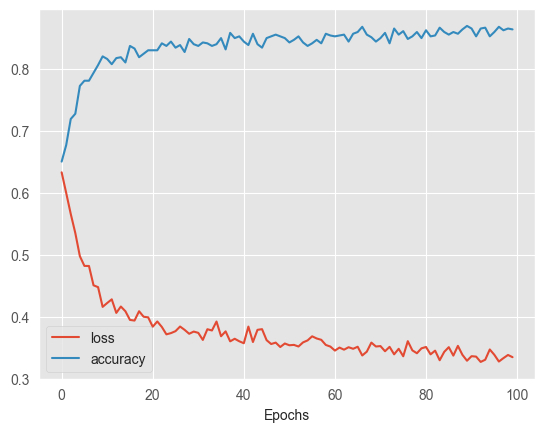

In [121]:
pd.DataFrame(history2.history).plot()
plt.xlabel("Epochs")
plt.show()

# Formatting my first submission

In [122]:
to_drop = ["Cabin", "Ticket", "PassengerId"]
test_to_predict = test.drop(to_drop, axis=1)

predictions = model2.predict(test_to_predict)
# print(predictions.flatten())

# Apply a threshold of 0.5 to the predictions
binary_predictions = (predictions > 0.5).astype(int)

# convert predictions into a dataframe
predictions_df = pd.DataFrame(binary_predictions, columns=["Survived"])
# Add the "PassengerId" column back to the DataFrame
predictions_df["PassengerId"] = np.arange(892, 1310)

# Reorder the columns in the DataFrame
predictions_df = predictions_df[["PassengerId", "Survived"]]



14/14 [==============================] - 0s 575us/step


In [123]:
# save predictions dataframe
os.chdir(os.path.join("/Users/NoahRipstein/PycharmProjects/Titanic/submission"))
print(os.getcwd())

predictions_df.to_csv("predictions.csv", index=False)

/Users/NoahRipstein/PycharmProjects/Titanic/submission


# Improving the model further with normalization

In [124]:
needed_cols = ["Age", "Fare", "Pclass", "Parch", "SibSp"]
for current_col in needed_cols:
    current_min = full_df[current_col].min()
    current_max = full_df[current_col].max()

    train[current_col] = (train[current_col] - current_min) / (current_max - current_min)
    test[current_col] = (test[current_col] - current_min) / (current_max - current_min)

In [125]:
display(train.describe())

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    0.654321    0.647587    0.370353   
std     257.353842    0.486592    0.418036    0.477990    0.162874   
min       1.000000    0.000000    0.000000    0.000000    0.003132   
25%     223.500000    0.000000    0.500000    0.000000    0.273456   
50%     446.000000    0.000000    1.000000    1.000000    0.372180   
75%     668.500000    1.000000    1.000000    1.000000    0.436302   
max     891.000000    1.000000    1.000000    1.000000    1.000000   

            SibSp       Parch        Fare  Embarked_C  Embarked_Q  Embarked_S  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.065376    0.042399    0.062858    0.188552    0.086420    0.725028   
std      0.137843    0.089562    0.096995    0.391372    0.281141    0.446751   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.015440    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.028213    0.000000    0.000000    1.000000   
75%      0.125000    0.000000    0.060508    0.000000    0.000000    1.000000   
max      1.000000    0.666667    1.000000    1.000000    1.000000    1.000000   

       Title_Master.  Title_Miss.   Title_Mr.  Title_Mrs.  
count     891.000000   891.000000  891.000000  891.000000  
mean        0.044893     0.207632    0.604938    0.142536  
std         0.207186     0.405840    0.489139    0.349796  
min         0.000000     0.000000    0.000000    0.000000  
25%         0.000000     0.000000    0.000000    0.000000  
50%         0.000000     0.000000    1.000000    0.000000  
75%         0.000000     0.000000    1.000000    0.000000  
max         1.000000     1.000000    1.000000    1.000000

In [126]:
print(3)

3


making new neural network for normalized data

In [127]:
to_drop = ["Cabin", "Ticket", "Survived", "PassengerId"]
x_train3_feed = train.drop(to_drop, axis=1)
y_train3_feed = train["Survived"]

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_train3_feed, y_train3_feed, test_size=0.2, random_state=1)

In [128]:
# building third neural network to try
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit
history3 = model3.fit(x_train3, y_train3, epochs=20, verbose=1, validation_data=(x_test3, y_test3))


Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.6179 - accuracy: 0.7430 - val_loss: 0.5742 - val_accuracy: 0.7542
Epoch 2/20
23/23 [==============================] - 0s 995us/step - loss: 0.5078 - accuracy: 0.7921 - val_loss: 0.5075 - val_accuracy: 0.7709
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.7893 - val_loss: 0.4911 - val_accuracy: 0.7821
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8146 - val_loss: 0.4913 - val_accuracy: 0.8045
Epoch 5/20
23/23 [==============================] - 0s 946us/step - loss: 0.4136 - accuracy: 0.8287 - val_loss: 0.4872 - val_accuracy: 0.7989
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8287 - val_loss: 0.4915 - val_accuracy: 0.7989
Epoch 7/20
23/23 [==============================] - 0s 966us/step - loss: 0.3996 - accuracy: 0.8455 - val_loss: 0.4819 - val_accuracy: 0.8045
Epoch 8/20
23/

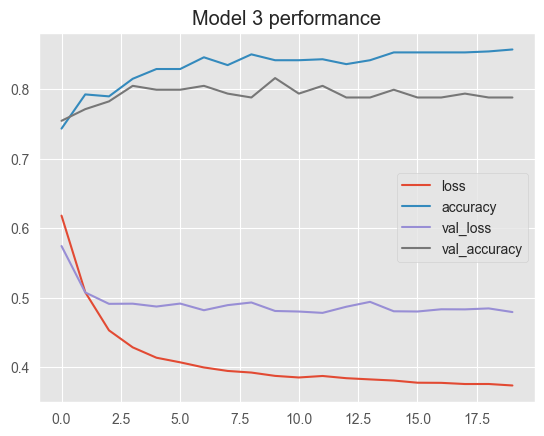

In [129]:
pd.DataFrame(history3.history).plot()
plt.title("Model 3 performance")
plt.show()

formatting for new submission

In [130]:
to_drop = ["Cabin", "Ticket", "PassengerId"]
test_to_predict = test.drop(to_drop, axis=1)

predictions = model3.predict(test_to_predict)

# Apply a threshold of 0.5 to the predictions
binary_predictions = (predictions > 0.5).astype(int)

# convert predictions into a dataframe
predictions_df = pd.DataFrame(binary_predictions, columns=["Survived"])
# Add the "PassengerId" column back to the DataFrame
predictions_df["PassengerId"] = np.arange(892, 1310)

# Reorder the columns in the DataFrame
predictions_df = predictions_df[["PassengerId", "Survived"]]

14/14 [==============================] - 0s 455us/step


In [131]:
# save predictions dataframe
os.chdir("/Users/NoahRipstein/PycharmProjects/Titanic/submission")
print(os.getcwd())

predictions_df.to_csv("predictions2.csv", index=False)

/Users/NoahRipstein/PycharmProjects/Titanic/submission
